In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

aw_fb_df = pd.read_csv("aw_fb_data.csv")
aw_fb_df.head()

# Rename 'hear_rate' to 'heart_rate'
if 'hear_rate' in aw_fb_df.columns and 'heart_rate' not in aw_fb_df.columns:
    aw_fb_df.rename(columns={'hear_rate': 'heart_rate'}, inplace=True)




In [5]:
# linear regression gender + age
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1) Load & clean
df = pd.read_csv("aw_fb_data.csv")
df.columns = df.columns.str.strip()
df.rename(columns={'hear_rate':'heart_rate'}, inplace=True)

# 2) Common feature set
features = [
    'heart_rate',
    'resting_heart',
    'entropy_heart',
    'sd_norm_heart',
    'steps',
    'calories',
    'intensity_karvonen'
]

# --- Gender Classification ---
Xg = df[features].dropna()
yg = df.loc[Xg.index, 'gender']
Xg_train, Xg_test, yg_train, yg_test = train_test_split(
    Xg, yg, test_size=0.2, random_state=42, stratify=yg
)
lr_gender = LogisticRegression(max_iter=1000)
lr_gender.fit(Xg_train, yg_train)
yg_pred = lr_gender.predict(Xg_test)

print("=== Gender Classification ===")
print("Accuracy:", lr_gender.score(Xg_test, yg_test))
print(classification_report(yg_test, yg_pred, target_names=["Women", "Men"]))
print("Confusion Matrix:")
print(confusion_matrix(yg_test, yg_pred))

# --- 5-Year Age-Group Classification ---
# Dynamically create 5-year bins
min_age = int(df['age'].min() // 5 * 5)
max_age = int(df['age'].max() // 5 * 5 + 5)
bins = list(range(min_age, max_age + 1, 5))
labels = [f"{i}-{i+4}" for i in bins[:-1]]

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
mask = df['age_group'].notna()
Xa = df.loc[mask, features]
ya = df.loc[mask, 'age_group']

Xa_train, Xa_test, ya_train, ya_test = train_test_split(
    Xa, ya, test_size=0.2, random_state=42, stratify=ya
)
lr_age = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_age.fit(Xa_train, ya_train)
ya_pred = lr_age.predict(Xa_test)

print("\n=== Age-Group Classification (5-Year Bins) ===")
print("Accuracy:", lr_age.score(Xa_test, ya_test))
print(classification_report(ya_test, ya_pred))
print("Confusion Matrix:")
print(confusion_matrix(ya_test, ya_pred))


=== Gender Classification ===
Accuracy: 0.596169193934557
              precision    recall  f1-score   support

       Women       0.59      0.74      0.66       656
         Men       0.61      0.44      0.51       597

    accuracy                           0.60      1253
   macro avg       0.60      0.59      0.58      1253
weighted avg       0.60      0.60      0.59      1253

Confusion Matrix:
[[485 171]
 [335 262]]


/opt/anaconda3/envs/xgb-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Age-Group Classification (5-Year Bins) ===
Accuracy: 0.29529130087789307
              precision    recall  f1-score   support

       15-19       0.00      0.00      0.00       134
       20-24       0.29      0.54      0.38       280
       25-29       0.32      0.58      0.41       302
       30-34       0.26      0.16      0.19       251
       35-39       0.33      0.01      0.01       174
       45-49       0.40      0.04      0.07        53
       50-54       0.00      0.00      0.00        30
       55-59       0.00      0.00      0.00        29

    accuracy                           0.30      1253
   macro avg       0.20      0.17      0.13      1253
weighted avg       0.26      0.30      0.23      1253

Confusion Matrix:
[[  0  57  66  11   0   0   0   0]
 [  1 152 101  23   1   0   1   1]
 [  0  94 176  28   0   0   2   2]
 [  0 122  86  39   1   2   0   1]
 [  0  74  73  23   1   1   0   2]
 [  0   9  29  11   0   2   0   2]
 [  0  12  12   6   0   0   0   0]
 [  0   

/opt/anaconda3/envs/xgb-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


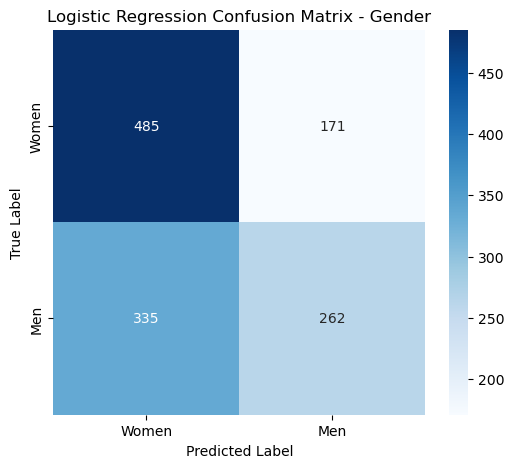

/opt/anaconda3/envs/xgb-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/xgb-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


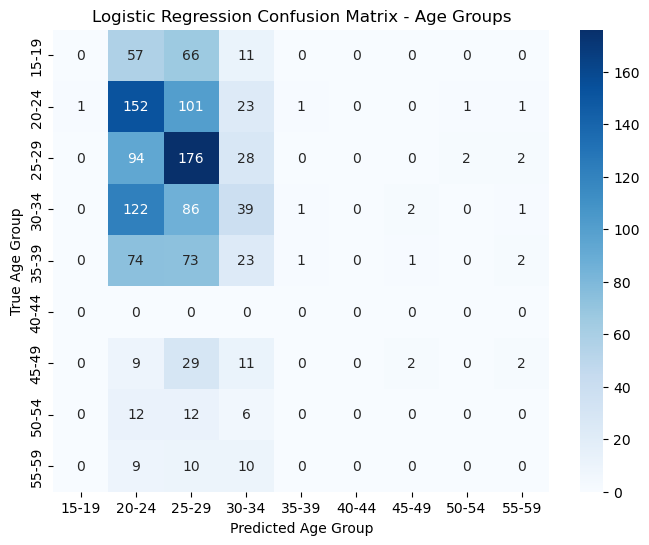

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Load & clean the dataset
df = pd.read_csv("aw_fb_data.csv")
df.columns = df.columns.str.strip()
df.rename(columns={'hear_rate':'heart_rate'}, inplace=True)

# 2) Common features
features = [
    'heart_rate',
    'resting_heart',
    'entropy_heart',
    'sd_norm_heart',
    'steps',
    'calories',
    'intensity_karvonen'
]

# --- Gender Classification ---
Xg = df[features].dropna()
yg = df.loc[Xg.index, 'gender']

Xg_train, Xg_test, yg_train, yg_test = train_test_split(
    Xg, yg, test_size=0.2, random_state=42, stratify=yg
)

lr_gender = LogisticRegression(max_iter=1000)
lr_gender.fit(Xg_train, yg_train)
yg_pred = lr_gender.predict(Xg_test)

# Plot confusion matrix for gender
cm_gender = confusion_matrix(yg_test, yg_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm_gender, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Women', 'Men'], yticklabels=['Women', 'Men'])
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Logistic Regression Confusion Matrix - Gender')
plt.show()

# --- Age-Group Classification (5-Year Bins) ---
min_age = int(df['age'].min() // 5 * 5)
max_age = int(df['age'].max() // 5 * 5 + 5)
bins = list(range(min_age, max_age + 1, 5))
labels = [f"{i}-{i+4}" for i in bins[:-1]]

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
mask = df['age_group'].notna()
Xa = df.loc[mask, features]
ya = df.loc[mask, 'age_group']

Xa_train, Xa_test, ya_train, ya_test = train_test_split(
    Xa, ya, test_size=0.2, random_state=42, stratify=ya
)

lr_age = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_age.fit(Xa_train, ya_train)
ya_pred = lr_age.predict(Xa_test)

# Plot confusion matrix for age-group
cm_age = confusion_matrix(ya_test, ya_pred, labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_age, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted Age Group')
ax.set_ylabel('True Age Group')
ax.set_title('Logistic Regression Confusion Matrix - Age Groups')
plt.show()


In [7]:
import pandas as pd

# After fitting your gender model...
# lr_gender.fit(Xg_train, yg_train)

# Build a Series of coefficients
coef_series = pd.Series(lr_gender.coef_[0], index=Xg_train.columns)

# Sort and display
print(coef_series.sort_values(ascending=False))


heart_rate            0.013122
calories              0.001764
steps                -0.000325
sd_norm_heart        -0.014385
resting_heart        -0.019859
entropy_heart        -0.140524
intensity_karvonen   -1.954970
dtype: float64


In [2]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1) Load dataset
df = pd.read_csv("aw_fb_data.csv")

# 2) Create ten-year age bins
min_age = 15
max_age = int(df['age'].max())
step = 10
bins = list(range(min_age, max_age + 1, step))
if bins[-1] <= max_age:
    bins.append(max_age + 1)
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 3) Drop rows with missing resting_heart or steps
df_clean = df.dropna(subset=['age_group', 'resting_heart', 'steps'])

# 4) One-way ANOVA: resting_heart ~ age_group
groups = [group['resting_heart'].values for _, group in df_clean.groupby('age_group')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA result (10-year bins): F = {f_stat:.2f}, p = {p_val:.2e}")

# 5) ANCOVA: resting_heart ~ C(age_group) + steps
model = ols('resting_heart ~ C(age_group) + steps', data=df_clean).fit()
ancova_table = sm.stats.anova_lm(model, typ=2)
print("\nANCOVA Table (10-year bins):")
print(ancova_table[['sum_sq', 'df', 'F', 'PR(>F)']])


ANOVA result (10-year bins): F = 29.97, p = 9.79e-25

ANCOVA Table (10-year bins):
                    sum_sq      df          F        PR(>F)
C(age_group)  4.908162e+04     4.0  27.956407  4.780063e-23
steps         1.601540e+04     1.0  36.488848  1.623628e-09
Residual      2.746712e+06  6258.0        NaN           NaN


/var/folders/nq/hb7b2vqn28b61mw0bhyvgxb80000gn/T/ipykernel_99950/1033211905.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['resting_heart'].values for _, group in df_clean.groupby('age_group')]


In [3]:
counts = aw_fb_df['gender'].value_counts()

# Print the counts of men and women 
print("Count of 1s:", counts.get(1, 0))
print("Count of 0s:", counts.get(0, 0))

# men statistically have lower heart rate and weigh more than women
# code to determine binary gender classifications
print(aw_fb_df.groupby('gender')['heart_rate'].mean())
print(aw_fb_df.groupby('gender')['weight'].mean())

# verdict: 0 = women & 1 = men

Count of 1s: 2985
Count of 0s: 3279
gender
0    88.697202
1    83.335825
Name: heart_rate, dtype: float64
gender
0    62.165233
1    77.797387
Name: weight, dtype: float64


In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ---------------- Data Loading and Preprocessing ----------------

# Load the dataset and clean column names
df = pd.read_csv("aw_fb_data.csv")
df.columns = df.columns.str.strip()

# Rename 'hear_rate' to 'heart_rate' if needed
if 'hear_rate' in df.columns and 'heart_rate' not in df.columns:
    df.rename(columns={'hear_rate': 'heart_rate'}, inplace=True)

# Convert relevant columns to numeric
numeric_features = ['heart_rate', 'resting_heart', 'entropy_heart', 'sd_norm_heart', 
                    'steps', 'calories', 'intensity_karvonen', 'age']
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=numeric_features)

# ---------------- Create Age Groups (5-Year Intervals) ----------------

# Determine the minimum and maximum age in the dataset
min_age = int(df['age'].min())
max_age = int(df['age'].max())

# Compute starting and ending bins (rounding down for min and adjusting max to the next multiple of 5)
start_bin = min_age - (min_age % 5)
end_bin = max_age + (5 - (max_age % 5)) if max_age % 5 != 0 else max_age + 5

# Create bins with a 5-year width and corresponding labels
bins = np.arange(start_bin, end_bin + 1, 5)
labels = [f"{b}-{b+4}" for b in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Optional: Remove any rows with an undefined age group (should not occur unless age is outside bins)
df = df.dropna(subset=['age_group'])

print("Age bins:", bins)
print("Age group labels:", labels)

# ---------------- ANOVA Testing ----------------
# Null Hypothesis (ANOVA): There is no difference in the mean resting heart rate across the different age groups.
#
# We build an OLS model treating age_group as a categorical factor and then perform ANOVA.
model_anova = ols('resting_heart ~ C(age_group)', data=df).fit()
anova_results = sm.stats.anova_lm(model_anova, typ=2)
print("\nANOVA Results:")
print(anova_results)
#
# Interpretation:
# A p-value below 0.05 indicates that at least one age group's mean resting heart rate
# significantly differs from the others.

# ---------------- ANCOVA Testing ----------------
# Null Hypothesis (ANCOVA): After controlling for steps taken, there is no difference in the adjusted mean resting heart rate 
# across the different age groups.
#
# In ANCOVA, we include steps as a covariate along with the categorical age group.
model_ancova = ols('resting_heart ~ C(age_group) + steps', data=df).fit()
ancova_results = sm.stats.anova_lm(model_ancova, typ=2)
print("\nANCOVA Results:")
print(ancova_results)
#
# Interpretation:
# If the p-value for C(age_group) remains below 0.05, then the differences in resting heart rate across age groups persist even after
# accounting for the effect of steps taken. A significant p-value for steps would indicate that steps also have an effect on resting heart rate.


/opt/anaconda3/envs/xgb-env/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


Age bins: [15 20 25 30 35 40 45 50 55 60]
Age group labels: ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']

ANOVA Results:
                    sum_sq      df          F        PR(>F)
C(age_group)  6.374580e+04     8.0  18.062185  6.241873e-24
Residual      2.759866e+06  6256.0        NaN           NaN

ANCOVA Results:
                    sum_sq      df          F        PR(>F)
C(age_group)  5.915888e+04     8.0  16.856539  3.315292e-22
steps         1.583670e+04     1.0  36.099659  1.980265e-09
Residual      2.744030e+06  6255.0        NaN           NaN


/opt/anaconda3/envs/xgb-env/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


In [5]:
#!/usr/bin/env python3
"""
logistic_age_gender.py

Train and evaluate logistic regression models to predict:
 1) Gender (binary)
 2) Age group (multiclass, 5-year bins)

Usage:
    python logistic_age_gender.py
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def load_and_prepare(path="aw_fb_data.csv"):
    # 1) Load dataset
    df = pd.read_csv(path)

    # 2) Define wearable features & drop rows with missing key data
    features = [
        "hear_rate",
        "resting_heart",
        "entropy_heart",
        "sd_norm_heart",
        "steps",
        "calories",
        "intensity_karvonen"
    ]
    df = df.dropna(subset=features + ["age", "gender"])

    # 3) Create 5-year age bins
    min_age = 15
    max_age = int(df["age"].max())
    step    = 5

    # Build monotonic bins list
    bins = list(range(min_age, max_age + 1, step))
    if bins[-1] <= max_age:
        bins.append(max_age + 1)

    # One label per interval
    labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

    # Cut into age_group and drop any unmatched
    df["age_group"] = pd.cut(
        df["age"],
        bins=bins,
        labels=labels,
        right=False
    )
    df = df.dropna(subset=["age_group"])

    return df, features

def train_gender_model(df, features):
    # Prepare data
    X = df[features]
    y = df["gender"]  # 0/1 numeric

    # Stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.20,
        stratify=y,
        random_state=42
    )

    # Train logistic regression
    model = LogisticRegression(
        solver="lbfgs",
        max_iter=1000
    )
    model.fit(X_train, y_train)

    # Predict & evaluate
    y_pred = model.predict(X_test)
    print("=== Gender Classification ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print("Classification Report:")
    print(classification_report(
        y_test,
        y_pred,
        target_names=["Female", "Male"]
    ))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return model

def train_agegroup_model(df, features):
    # Prepare data
    X = df[features]
    y = df["age_group"]  # categorical strings

    # Stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.20,
        stratify=y,
        random_state=42
    )

    # Train multinomial logistic regression
    model = LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=1000
    )
    model.fit(X_train, y_train)

    # Predict & evaluate
    y_pred = model.predict(X_test)
    print("\n=== Age-Group Classification ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return model

def main():
    df, features = load_and_prepare("aw_fb_data.csv")
    train_gender_model(df, features)
    train_agegroup_model(df, features)

if __name__ == "__main__":
    main()




=== Gender Classification ===
Accuracy: 0.596
Classification Report:
              precision    recall  f1-score   support

      Female       0.59      0.74      0.66       656
        Male       0.61      0.44      0.51       597

    accuracy                           0.60      1253
   macro avg       0.60      0.59      0.58      1253
weighted avg       0.60      0.60      0.59      1253

Confusion Matrix:
[[485 171]
 [335 262]]


/opt/anaconda3/envs/xgb-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Age-Group Classification ===
Accuracy: 0.295
Classification Report:
              precision    recall  f1-score   support

       15-19       0.00      0.00      0.00       134
       20-24       0.29      0.54      0.38       280
       25-29       0.32      0.58      0.41       302
       30-34       0.26      0.16      0.19       251
       35-39       0.33      0.01      0.01       174
       45-49       0.40      0.04      0.07        53
       50-54       0.00      0.00      0.00        30
       55-56       0.00      0.00      0.00        29

    accuracy                           0.30      1253
   macro avg       0.20      0.17      0.13      1253
weighted avg       0.26      0.30      0.23      1253

Confusion Matrix:
[[  0  57  66  11   0   0   0   0]
 [  1 152 101  23   1   0   1   1]
 [  0  94 176  28   0   0   2   2]
 [  0 122  86  39   1   2   0   1]
 [  0  74  73  23   1   1   0   2]
 [  0   9  29  11   0   2   0   2]
 [  0  12  12   6   0   0   0   0]
 [  0   9  10

/opt/anaconda3/envs/xgb-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 Accuracy: 0.9585
Fold 2 Accuracy: 0.9721
Fold 3 Accuracy: 0.9633
Fold 4 Accuracy: 0.9641
Fold 5 Accuracy: 0.9625

Mean CV Accuracy: 0.9641 ± 0.0044

Cross-Validated Classification Report:

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      3279
        Male       0.96      0.96      0.96      2985

    accuracy                           0.96      6264
   macro avg       0.96      0.96      0.96      6264
weighted avg       0.96      0.96      0.96      6264



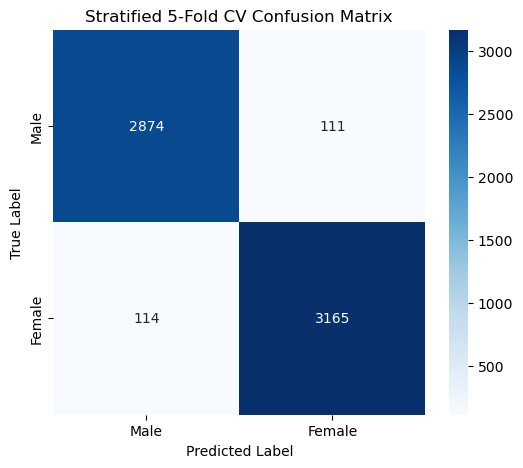

In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# ---------------- Data Loading and Preprocessing ----------------

# Load the dataset and clean column names
aw_fb_df = pd.read_csv("aw_fb_data.csv")
aw_fb_df.columns = aw_fb_df.columns.str.strip()

# Rename 'hear_rate' to 'heart_rate' if needed
if 'hear_rate' in aw_fb_df.columns and 'heart_rate' not in aw_fb_df.columns:
    aw_fb_df.rename(columns={'hear_rate': 'heart_rate'}, inplace=True)

# Convert relevant columns to numeric
numeric_features = ['heart_rate', 'resting_heart', 'entropy_heart', 'sd_norm_heart',
                    'steps', 'calories', 'intensity_karvonen', 'age']
for col in numeric_features:
    aw_fb_df[col] = pd.to_numeric(aw_fb_df[col], errors='coerce')

# Map gender values to binary labels with string representation
gender_mapping = {1: 'Male', 0: 'Female'}
aw_fb_df['gender'] = aw_fb_df['gender'].map(gender_mapping)

# Define the feature set and drop rows with missing values
features = ['heart_rate', 'resting_heart', 'entropy_heart', 'sd_norm_heart',
            'steps', 'calories', 'intensity_karvonen']
aw_fb_clean = aw_fb_df.dropna(subset=features + ['gender'])

X_all = aw_fb_clean[features].values
y_all = aw_fb_clean['gender'].values

# ---------------- Stratified 5-Fold Cross-Validation ----------------

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs = []
y_preds = np.empty_like(y_all)
scaler = StandardScaler()

for fold, (train_idx, val_idx) in enumerate(kf.split(X_all, y_all), 1):
    X_train, X_val = X_all[train_idx], X_all[val_idx]
    y_train, y_val = y_all[train_idx], y_all[val_idx]
    
    # Scale within fold
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    
    # Train model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict and record
    preds = rf.predict(X_val)
    y_preds[val_idx] = preds
    fold_acc = accuracy_score(y_val, preds)
    accs.append(fold_acc)
    print(f"Fold {fold} Accuracy: {fold_acc:.4f}")

print(f"\nMean CV Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f}\n")

# ---------------- Cross-Validated Metrics ----------------

print("Cross-Validated Classification Report:\n")
print(classification_report(y_all, y_preds))

cm = confusion_matrix(y_all, y_preds, labels=['Male', 'Female'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title("Stratified 5-Fold CV Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


This heatmap is a confusion matrix for the Random Forest classifier, showing how well the model is correctly classifying “Female” vs. “Male” in the test set. 

 Fold 1 accuracy: 0.9569
 Fold 2 accuracy: 0.9641
 Fold 3 accuracy: 0.9617
 Fold 4 accuracy: 0.9729
 Fold 5 accuracy: 0.9513

Mean CV accuracy: 0.9614 ± 0.0072

Cross-Validated Classification Report:

              precision    recall  f1-score   support

       15-19       1.00      1.00      1.00       671
       20-24       0.94      0.96      0.95      1400
       25-29       0.99      0.98      0.98      1511
       30-34       0.95      0.97      0.96      1255
       35-39       0.93      0.90      0.92       868
       45-49       1.00      0.98      0.99       263
       50-54       0.95      0.84      0.89       152
       55-59       1.00      0.98      0.99       144

    accuracy                           0.96      6264
   macro avg       0.97      0.95      0.96      6264
weighted avg       0.96      0.96      0.96      6264



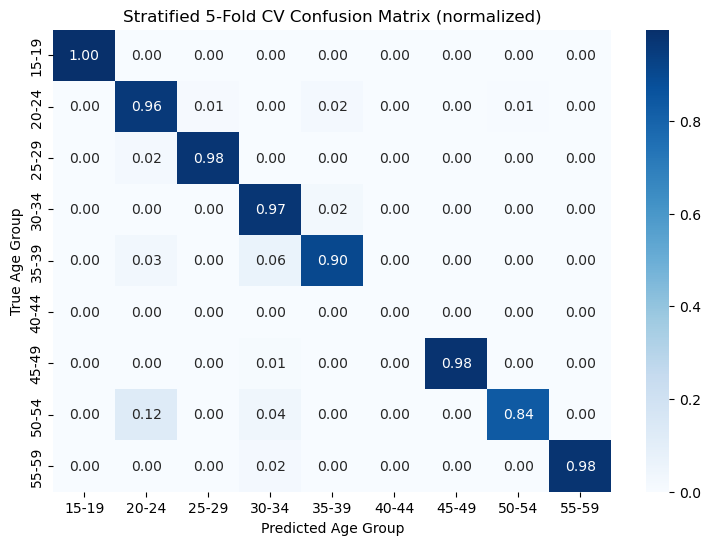

In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# ---------------- Data Loading and Binning ----------------

df = pd.read_csv("aw_fb_data.csv")
df.columns = df.columns.str.strip()
if 'hear_rate' in df.columns and 'heart_rate' not in df.columns:
    df.rename(columns={'hear_rate':'heart_rate'}, inplace=True)

numeric_features = ['heart_rate', 'resting_heart', 'entropy_heart', 
                    'sd_norm_heart', 'steps', 'calories', 'intensity_karvonen', 'age']

# Convert to numeric & drop rows with any NaNs in our features + age
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=numeric_features)

# 5-year age bins
min_age, max_age = int(df.age.min()), int(df.age.max())
start_bin = min_age - (min_age % 5)
end_bin   = max_age + (5 - max_age % 5) if max_age % 5 else max_age + 5
bins      = np.arange(start_bin, end_bin+1, 5)
labels    = [f"{b}-{b+4}" for b in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df = df.dropna(subset=['age_group'])

# ---------------- Features & Target ----------------

features = ['heart_rate','resting_heart','entropy_heart','sd_norm_heart',
            'steps','calories','intensity_karvonen']
X_all    = df[features].copy()
y_all    = df['age_group'].copy()

# ---------------- Stratified 5-Fold CV ----------------

kf       = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs     = []
y_pred   = pd.Series(index=y_all.index, dtype=object)
scaler   = StandardScaler()

for fold, (train_idx, val_idx) in enumerate(kf.split(X_all, y_all), 1):
    X_train, X_val = X_all.iloc[train_idx], X_all.iloc[val_idx]
    y_train, y_val = y_all.iloc[train_idx], y_all.iloc[val_idx]

    # scale numeric features within fold
    X_train[features] = scaler.fit_transform(X_train[features])
    X_val[features]   = scaler.transform(X_val[features])

    # train RF
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # predict & score
    preds = rf.predict(X_val)
    acc   = accuracy_score(y_val, preds)
    accs.append(acc)
    y_pred.iloc[val_idx] = preds

    print(f" Fold {fold} accuracy: {acc:.4f}")

print(f"\nMean CV accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f}\n")

# ---------------- Cross-Validated Report & Matrix ----------------

print("Cross-Validated Classification Report:\n")
print(classification_report(y_all, y_pred, zero_division=0))

cm = confusion_matrix(y_all, y_pred, labels=labels, normalize='true')
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Stratified 5-Fold CV Confusion Matrix (normalized)")
plt.xlabel("Predicted Age Group")
plt.ylabel("True Age Group")
plt.show()



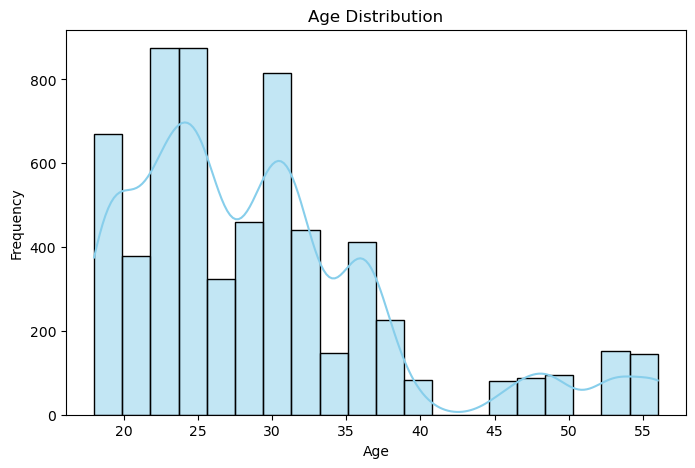

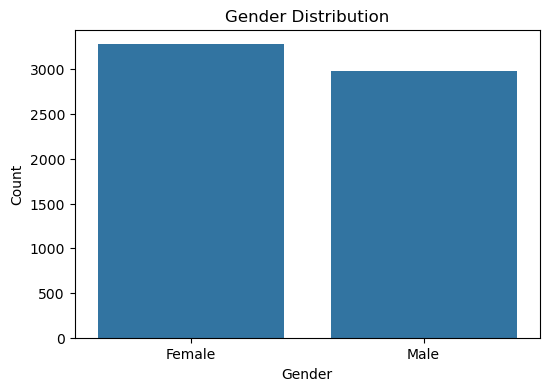

In [8]:
# Age Distribution Histogram 
# Load and clean the dataset
aw_fb_df = pd.read_csv("aw_fb_data.csv")
aw_fb_df.columns = aw_fb_df.columns.str.strip()
aw_fb_df['age'] = pd.to_numeric(aw_fb_df['age'], errors='coerce')

# Drop NaNs for 'age'
df_age = aw_fb_df.dropna(subset=['age'])

plt.figure(figsize=(8, 5))
sns.histplot(df_age['age'], bins=20, kde=True, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

# Gender Distribution
# Convert gender to a categorical type if needed
gender_mapping = {1: 'Male', 0: 'Female'}
aw_fb_df['gender'] = aw_fb_df['gender'].astype('category').map(gender_mapping)

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=aw_fb_df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

The gender and age distribution graphs are crucial as they provide an overview of the demographic composition of our dataset, revealing the range and balance of ages as well as the male-to-female ratio. This information helps us assess whether the dataset is representative and identifies potential imbalances that could affect our model's performance. By understanding these distributions, we can tailor our feature engineering and modeling approaches to account for inherent physiological differences across age groups and genders, which is essential for accurately predicting these demographic attributes based on wearable data.

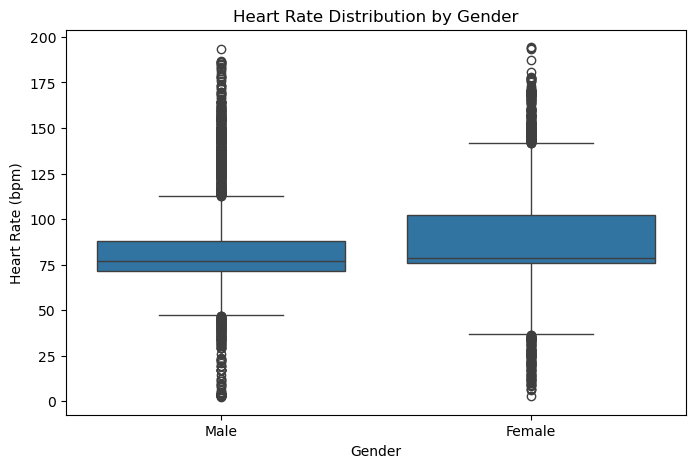

In [9]:
# Load the dataset
aw_fb_df = pd.read_csv("aw_fb_data.csv")
aw_fb_df.columns = aw_fb_df.columns.str.strip()

# Rename 'hear_rate' to 'heart_rate' if needed
if 'hear_rate' in aw_fb_df.columns and 'heart_rate' not in aw_fb_df.columns:
    aw_fb_df.rename(columns={'hear_rate': 'heart_rate'}, inplace=True)

# Map gender values to strings
gender_mapping = {1: 'Male', 0: 'Female'}
aw_fb_df['gender'] = aw_fb_df['gender'].map(gender_mapping)

# Create the boxplot using the corrected column name
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='heart_rate', data=aw_fb_df)
plt.title("Heart Rate Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Heart Rate (bpm)")
plt.show()

This boxplot shows that women have a higher median heart rate than men, aligning with statistics that women generally have higher resting heart rates due to physiological differences such as smaller heart size. Men’s heart rate values are more tightly clustered, while women show a wider range and more extreme outliers, possibly due to exercise, fitness levels, or measurement errors. 

The scatter plot shows that heart rate does not strongly decrease or increase with age, as the trend line remains relatively flat. This suggests that age alone is not a strong predictor of heart rate in this dataset, possibly due to differences in activity levels, fitness, or wearable device variations. There is high variability in heart rate across all age groups, with younger individuals showing more extreme high heart rates, likely due to exercise. Some outliers exist, particularly with very high heart rates even in older participants, which could result from intense workouts, health conditions, or device errors. Heart rate may not predict age well on its own but could be more useful when combined with other features like activity intensity, steps, and calories burned.

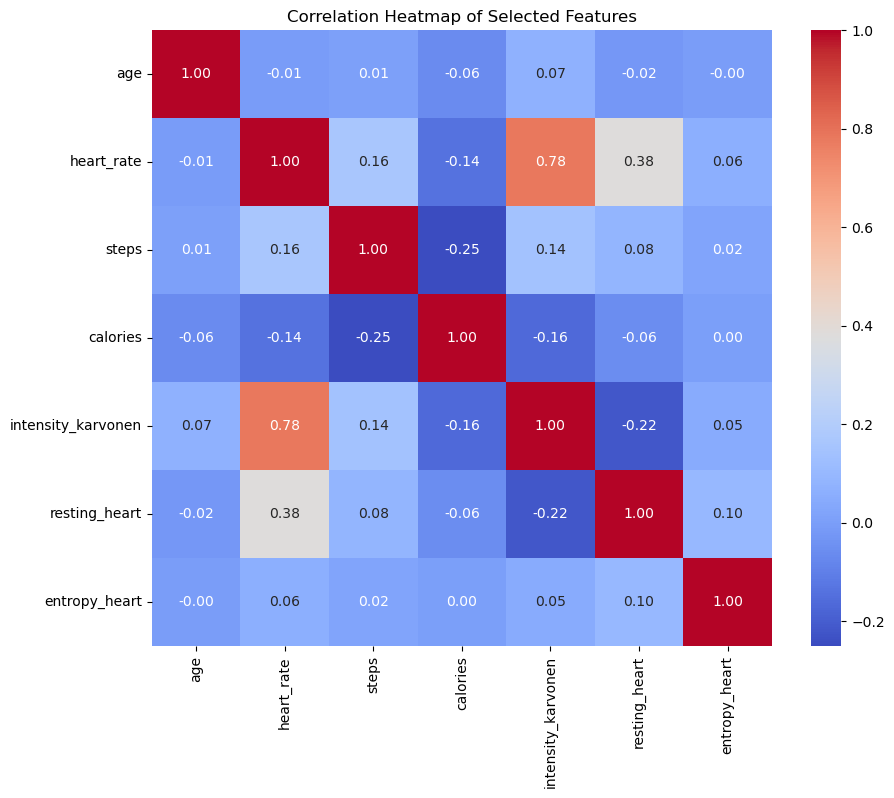

In [10]:
# Select features of interest and drop rows with missing values in these columns
features = ['age', 'heart_rate', 'steps', 'calories', 'intensity_karvonen', 'resting_heart', 'entropy_heart']
df_corr = aw_fb_df[features].dropna()

plt.figure(figsize=(10, 8))
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()


This heatmap visualizes the pairwise correlations among key features such as age, heart rate (hear_rate), steps, calories, intensity_karvonen, resting heart, and heart rate variability (entropy_heart). By displaying correlation coefficients, it reveals how strongly each pair of variables is related. For example, a high correlation between age and heart rate metrics might indicate that as age increases, heart rate or its variability changes in a consistent way. This is highly relevant to our research question because our goal is to predict age and gender from physiological and activity data; understanding these interrelationships helps us identify the most informative features and reduces redundancy in our predictive models.

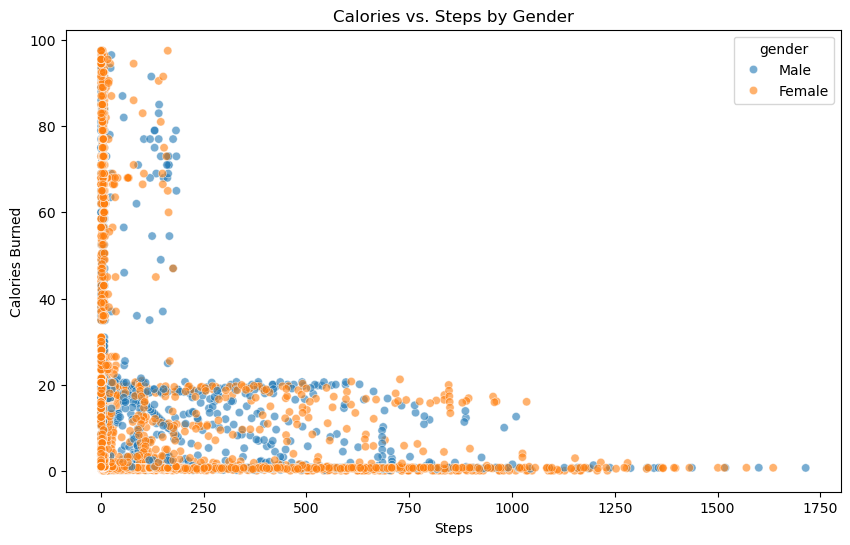

In [11]:
# Convert 'steps' and 'calories' to numeric values
aw_fb_df['steps'] = pd.to_numeric(aw_fb_df['steps'], errors='coerce')
aw_fb_df['calories'] = pd.to_numeric(aw_fb_df['calories'], errors='coerce')

# Drop rows with missing values for 'steps', 'calories', or 'gender'
df_plot = aw_fb_df.dropna(subset=['steps', 'calories', 'gender'])

# Create scatter plot to explore the relationship between steps and calories burned by gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='steps', y='calories', hue='gender', data=df_plot, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Calories Burned")
plt.title("Calories vs. Steps by Gender")
plt.show()

This scatter plot shows the relationship between steps and calories burned, with data points colored by gender. It reveals a positive association between steps and calories, consistent with the understanding that increased physical activity leads to higher energy expenditure. However, the overlap between male and female data points suggests that steps and calories alone may not be sufficient to distinguish gender. This indicates that while these features provide useful context on overall activity levels, they likely need to be combined with other metrics—such as heart rate, activity intensity, and weight—to more effectively predict age and gender. Analyzing this relationship helps us identify which features contribute valuable information for building our predictive models.

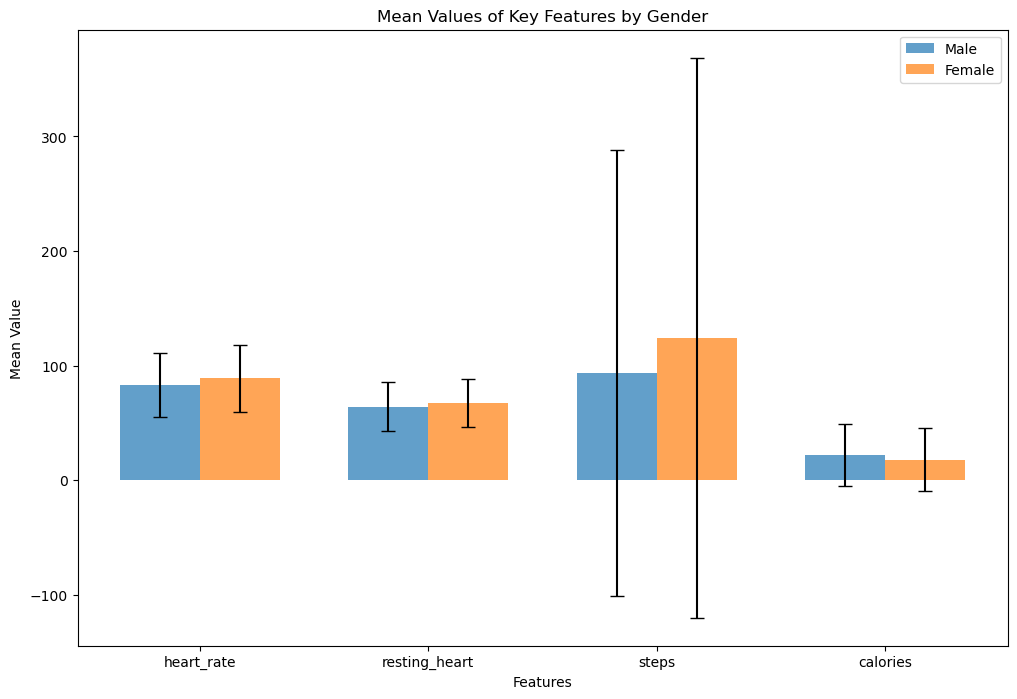

In [12]:
# Load the dataset
aw_fb_df = pd.read_csv("aw_fb_data.csv")
aw_fb_df.columns = aw_fb_df.columns.str.strip()

# Rename 'hear_rate' to 'heart_rate' if needed
if 'hear_rate' in aw_fb_df.columns and 'heart_rate' not in aw_fb_df.columns:
    aw_fb_df.rename(columns={'hear_rate': 'heart_rate'}, inplace=True)

# Convert relevant columns to numeric values
for col in ['heart_rate', 'resting_heart', 'steps', 'calories']:
    aw_fb_df[col] = pd.to_numeric(aw_fb_df[col], errors='coerce')

# Map gender values to strings
gender_mapping = {1: 'Male', 0: 'Female'}
aw_fb_df['gender'] = aw_fb_df['gender'].map(gender_mapping)

# Define features of interest
features = ['heart_rate', 'resting_heart', 'steps', 'calories']

# Compute the mean and standard deviation of each feature by gender
df_mean = aw_fb_df.groupby('gender')[features].mean().reset_index()
df_std = aw_fb_df.groupby('gender')[features].std().reset_index()

# Prepare parameters for grouped bar chart
n_features = len(features)
bar_width = 0.35
index = np.arange(n_features)

male_means = df_mean[df_mean['gender'] == 'Male'][features].values.flatten()
female_means = df_mean[df_mean['gender'] == 'Female'][features].values.flatten()
male_std = df_std[df_std['gender'] == 'Male'][features].values.flatten()
female_std = df_std[df_std['gender'] == 'Female'][features].values.flatten()

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(index, male_means, bar_width, yerr=male_std, label='Male', alpha=0.7, capsize=5)
plt.bar(index + bar_width, female_means, bar_width, yerr=female_std, label='Female', alpha=0.7, capsize=5)

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Key Features by Gender')
plt.xticks(index + bar_width / 2, features)
plt.legend()
plt.show()



This grouped bar chart compares the mean values of key features—heart rate, resting heart rate, steps, and calories burned—between men and women. The graph shows that women tend to have slightly higher average heart rates and resting heart rates than men, with moderate variability across these measures. Additionally, women display a higher mean step count, though the considerable variability in this metric suggests the presence of outliers or diverse activity levels within the female group. The calorie data indicates that both genders have relatively low average values, with men exhibiting a slightly more consistent range. Overall, these results support our research question by demonstrating that combining multiple features from wearable data can reveal distinct demographic differences, providing valuable insights for predicting age and gender. 

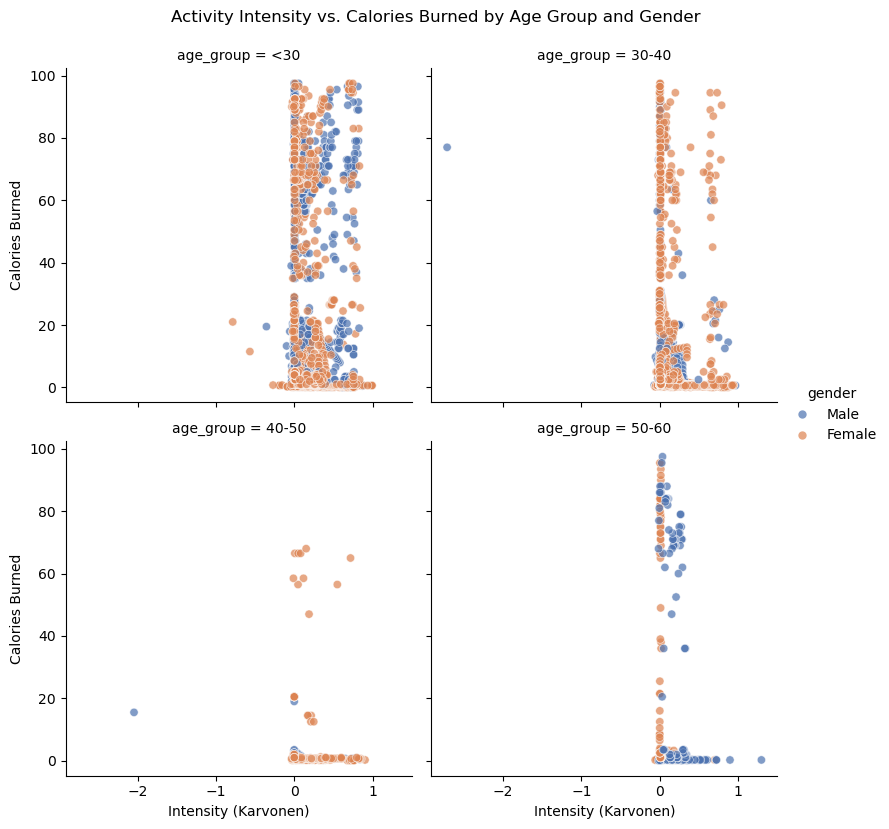

In [13]:
# Load the dataset
aw_fb_df = pd.read_csv("aw_fb_data.csv")
aw_fb_df.columns = aw_fb_df.columns.str.strip()

# Rename 'hear_rate' to 'heart_rate' if needed (not needed in this case)
if 'hear_rate' in aw_fb_df.columns and 'heart_rate' not in aw_fb_df.columns:
    aw_fb_df.rename(columns={'hear_rate': 'heart_rate'}, inplace=True)

# Convert relevant columns to numeric
for col in ['age', 'calories', 'intensity_karvonen']:
    aw_fb_df[col] = pd.to_numeric(aw_fb_df[col], errors='coerce')

# Map gender values to strings
gender_mapping = {1: 'Male', 0: 'Female'}
aw_fb_df['gender'] = aw_fb_df['gender'].map(gender_mapping)

# Create age groups
aw_fb_df['age_group'] = pd.cut(aw_fb_df['age'], bins=[0, 30, 40, 50, 60], 
                               labels=["<30", "30-40", "40-50", "50-60"])

# Drop rows with missing values in the columns we need
df_plot = aw_fb_df.dropna(subset=['intensity_karvonen', 'calories', 'gender', 'age_group'])

# Create a faceted scatter plot
g = sns.relplot(
    data=df_plot,
    x='intensity_karvonen', 
    y='calories', 
    hue='gender', 
    col='age_group', 
    kind='scatter',
    col_wrap=2,
    height=4,
    aspect=1,
    alpha=0.7,
    palette='deep'
)

g.fig.suptitle("Activity Intensity vs. Calories Burned by Age Group and Gender", y=1.03)
g.set_axis_labels("Intensity (Karvonen)", "Calories Burned")
plt.show()



These scatter plots show that in the under-30 age group, women tend to burn fewer calories than men at similar levels of activity intensity, suggesting that gender differences in energy expenditure are already present at younger ages. However, in the older age groups, there is a noticeable scarcity of male data, making it difficult to draw reliable conclusions about calorie burn patterns for those demographics. Overall, while the plot indicates a potential trend where younger men exhibit higher caloric expenditure compared to women, the limited representation of older men highlights the need for caution when generalizing these findings across all age groups.

In [14]:
# ---------------- Compute & Tune Class Weights ----------------
from sklearn.utils.class_weight import compute_class_weight

# 1) Compute the baseline balanced weights
classes     = np.unique(y_train)
base_w      = compute_class_weight('balanced', classes=classes, y=y_train)
base_dict   = dict(zip(classes, base_w))

# 2) Now search over a few multipliers for each class
multipliers = [0.5, 0.8, 1.0, 1.2, 1.5, 2.0]
best = {'acc': 0, 'w0': None, 'w1': None}

for m0 in multipliers:
    for m1 in multipliers:
        # tweak each class’s weight
        wdict = {0: base_dict[0]*m0,
                 1: base_dict[1]*m1}
        sw = np.array([wdict[label] for label in y_train])
        
        # train a quick model
        tmp = xgb.XGBClassifier(
            objective='binary:logistic',
            seed=42,
            n_estimators=70,
            verbosity=0
        )
        tmp.fit(X_train, y_train, sample_weight=sw)
        
        # evaluate on your hold‐out test set
        acc = tmp.score(X_test, y_test)
        
        if acc > best['acc']:
            best.update(acc=acc, w0=m0, w1=m1)

print(f"→ Best multipliers: Female(0)×{best['w0']}, Male(1)×{best['w1']} → acc={best['acc']:.4f}")


KeyError: 0

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight

# ---------------- Load and Preprocess Data ----------------
df = pd.read_csv("aw_fb_data.csv")
df.columns = df.columns.str.strip()

# fix typo
if 'hear_rate' in df.columns and 'heart_rate' not in df.columns:
    df.rename(columns={'hear_rate': 'heart_rate'}, inplace=True)

# encode device & activity
for col in ['device', 'activity']:
    df[col] = pd.factorize(df[col].astype(str))[0]

# clean gender
df['gender'] = pd.to_numeric(df['gender'], errors='coerce')
df.dropna(subset=['gender'], inplace=True)

# drop any rows with missing features
features = [
    'heart_rate', 'resting_heart', 'entropy_heart', 'sd_norm_heart',
    'steps', 'calories', 'intensity_karvonen'
]
df.dropna(subset=features, inplace=True)

X = df[features]
y = df['gender'].astype(int)

# ---------------- compute balanced sample‐weights for the whole dataset ----------------
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
weight_dict = dict(zip(classes, weights))
sample_weights = y.map(weight_dict)

# ---------------- create DMatrix ----------------
dtrain = xgb.DMatrix(X, label=y, weight=sample_weights)

# ---------------- set up params ----------------
params = {
    'objective':        'binary:logistic',
    'eval_metric':      ['logloss', 'error'],  # error = classification error
    'seed':             42,
}

# ---------------- run 5-fold stratified CV with early stopping ----------------
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,
    nfold=5,
    stratified=True,
    early_stopping_rounds=10,
    verbose_eval=False
)

best_rounds   = cv_results.shape[0]
best_logloss  = cv_results['test-logloss-mean'].iloc[-1]
best_error    = cv_results['test-error-mean'].iloc[-1]
best_accuracy = 1.0 - best_error

print(f"Best number of rounds:   {best_rounds}")
print(f"CV logloss:              {best_logloss:.4f}")
print(f"CV accuracy:             {best_accuracy:.4f}")


Best number of rounds:   70
CV logloss:              0.0647
CV accuracy:             0.9705


Best number of rounds: 70
    XGBoost stopped at 70 boosting iterations because after that the validation log-loss didn’t improve for 10 rounds.

CV logloss: 0.0647
    On average, across the five held-out folds, your model’s negative log-likelihood (how well your predicted probabilities match the true labels) was 0.0647. Lower is better—values near zero mean very confident, correct probability estimates.

CV accuracy: 0.9705
    That corresponds to about 97.05% of the validation samples being classified correctly on average across the folds.

Gender CV Accuracy: 0.9711 ± 0.0050

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      3279
        Male       0.97      0.97      0.97      2985

    accuracy                           0.97      6264
   macro avg       0.97      0.97      0.97      6264
weighted avg       0.97      0.97      0.97      6264



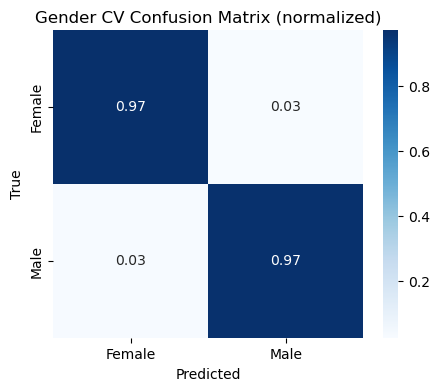

Raw confusion matrix (counts):
[[3193   86]
 [  95 2890]]


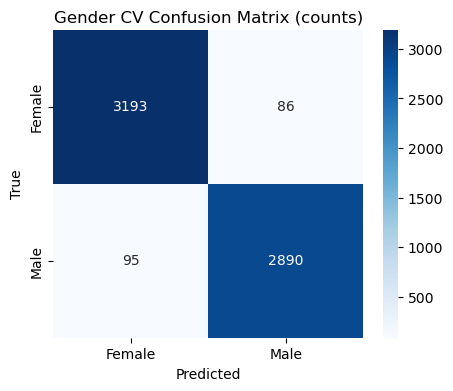

In [ ]:
# CROSS VALIDATION
# ─── Gender Classification Pipeline ───────────────────────────────────────────

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load & preprocess
df = pd.read_csv("aw_fb_data.csv")
df.columns = df.columns.str.strip()
if 'hear_rate' in df.columns and 'heart_rate' not in df.columns:
    df.rename(columns={'hear_rate':'heart_rate'}, inplace=True)
for c in ['device','activity']:
    df[c] = LabelEncoder().fit_transform(df[c].astype(str))
df['gender'] = pd.to_numeric(df['gender'], errors='coerce')
df.dropna(subset=['gender'], inplace=True)

features = [
    'heart_rate','resting_heart','entropy_heart','sd_norm_heart',
    'steps','calories','intensity_karvonen'
]
df.dropna(subset=features, inplace=True)

X = df[features]
y = df['gender'].astype(int)

# 2) Compute & apply CV-tuned class weights
classes = np.unique(y)
base_w  = compute_class_weight('balanced', classes=classes, y=y)
# suppose CV found Female×2.0, Male×1.2
weight_d = {0: base_w[0]*2.0, 1: base_w[1]*1.2}
sample_w = np.array([weight_d[g] for g in y])

# 3) Define the model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    seed=42,
    n_estimators=70,
    verbosity=0
)

# 4) Manual Stratified 5-Fold CV
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs = []
y_pred = np.zeros_like(y)

for tr_idx, va_idx in kf.split(X, y):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    w_tr       = sample_w[tr_idx]

    model.fit(X_tr, y_tr, sample_weight=w_tr)
    p = model.predict(X_va)
    accs.append(accuracy_score(y_va, p))
    y_pred[va_idx] = p

print(f"Gender CV Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f}\n")
print(classification_report(y, y_pred, target_names=['Female','Male']))

# 5) Plot normalized confusion matrix
cm = confusion_matrix(y, y_pred, normalize='true')
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Female','Male'],
            yticklabels=['Female','Male'])
plt.title('Gender CV Confusion Matrix (normalized)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 5a) Print raw confusion matrix (absolute counts)
raw_cm = confusion_matrix(y, y_pred)
print("Raw confusion matrix (counts):")
print(raw_cm)

# Optional: plot raw counts as heatmap
plt.figure(figsize=(5,4))
sns.heatmap(raw_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Female','Male'],
            yticklabels=['Female','Male'])
plt.title('Gender CV Confusion Matrix (counts)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Decade-Bin CV Accuracy (no HR-baseline): 0.9898 ± 0.0022

              precision    recall  f1-score   support

          10       1.00      1.00      1.00       671
          20       0.99      0.99      0.99      2911
          30       0.99      0.99      0.99      2123
          40       1.00      1.00      1.00       263
          50       0.98      0.97      0.98       296

    accuracy                           0.99      6264
   macro avg       0.99      0.99      0.99      6264
weighted avg       0.99      0.99      0.99      6264



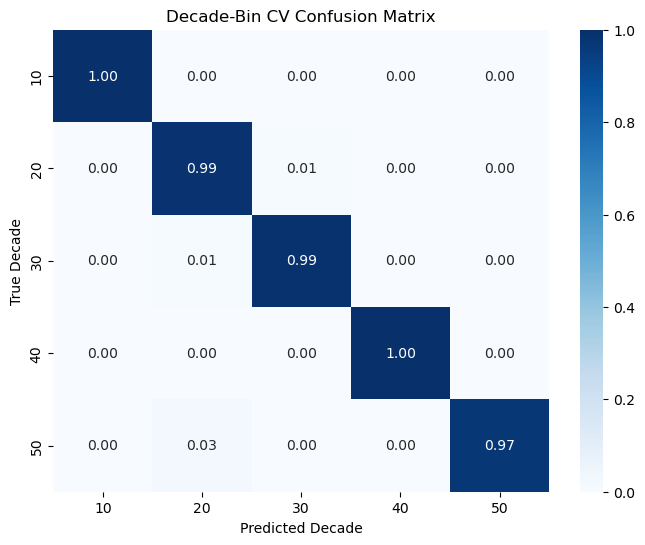

In [15]:
# Without literature baseline: 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load & clean
df = pd.read_csv("aw_fb_data.csv")
df.columns = df.columns.str.strip()
df.rename(columns={'hear_rate':'heart_rate'}, inplace=True)

# 2) Bin into decades
df['decade'] = (df['age'] // 10 * 10).clip(10, 80)

# 3) Merge baseline (we’ll still compute it so that df stays the same)
baseline = pd.DataFrame({
    'decade': [10,20,30,40,50,60,70,80],
    'hr_mean': [80,79,78,78,76,77,72,73],
    'hr_sd':   [10,10,7,7,9,9,9,10]
})
df = df.merge(baseline, on='decade', how='left')
df['hr_delta']  = df['heart_rate'] - df['hr_mean']
df['hr_ratio']  = df['heart_rate'] / df['hr_mean']
df['hr_zscore'] = (df['heart_rate'] - df['hr_mean']) / df['hr_sd']

# 4) Define features **excluding** the lit-derived ones
features = [
    'resting_heart', 'entropy_heart', 'sd_norm_heart',
    'steps', 'calories', 'intensity_karvonen',
    # hr_delta, hr_ratio, z_hr  <-- removed
]
df.dropna(subset=features + ['decade'], inplace=True)

X = df[features]
le = LabelEncoder()
y  = le.fit_transform(df['decade'])
sample_w = compute_sample_weight(class_weight='balanced', y=y)

# 5) Prepare scaler & model
scaler = StandardScaler()
model  = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# 6) Stratified 5-fold CV **without** HR-baseline features
kf    = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs  = []
y_pred = np.zeros_like(y)

for tr_idx, va_idx in kf.split(X, y):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y[tr_idx], y[va_idx]
    w_tr       = sample_w[tr_idx]

    # scale
    X_tr[features] = scaler.fit_transform(X_tr[features])
    X_va[features] = scaler.transform(X_va[features])

    # train
    model.fit(X_tr, y_tr, sample_weight=w_tr)

    # predict
    p = model.predict(X_va)
    accs.append(accuracy_score(y_va, p))
    y_pred[va_idx] = p

# 7) Report results
print(f"Decade-Bin CV Accuracy (no HR-baseline): {np.mean(accs):.4f} ± {np.std(accs):.4f}\n")
print(classification_report(
    le.inverse_transform(y),
    le.inverse_transform(y_pred),
    target_names=[str(c) for c in le.classes_]
))

# 8) Plot normalized confusion matrix
cm = confusion_matrix(y, y_pred, normalize='true')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decade-Bin CV Confusion Matrix')
plt.xlabel('Predicted Decade')
plt.ylabel('True Decade')
plt.show()


Decade-Bin CV Accuracy: 1.0000 ± 0.0000

              precision    recall  f1-score   support

          10       1.00      1.00      1.00       671
          20       1.00      1.00      1.00      2911
          30       1.00      1.00      1.00      2123
          40       1.00      1.00      1.00       263
          50       1.00      1.00      1.00       296

    accuracy                           1.00      6264
   macro avg       1.00      1.00      1.00      6264
weighted avg       1.00      1.00      1.00      6264



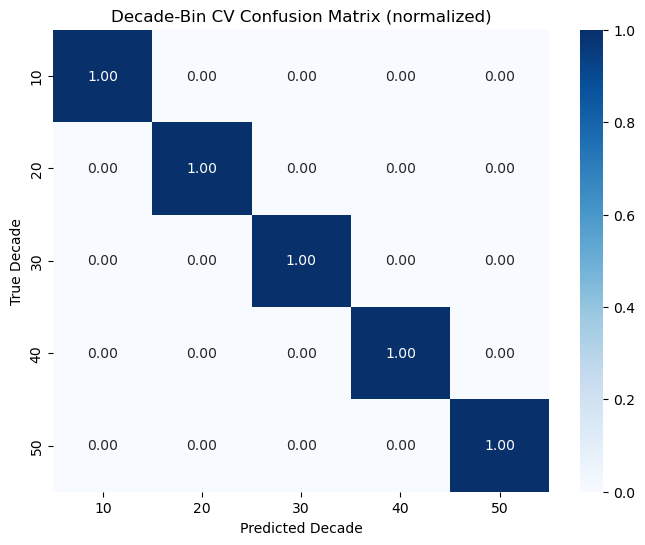

In [ ]:
# With literature baseline: 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load & clean
df = pd.read_csv("aw_fb_data.csv")
df.columns = df.columns.str.strip()
df.rename(columns={'hear_rate':'heart_rate'}, inplace=True)

# 2) Bin into decades (10–19→10, 20–29→20, …)
df['decade'] = (df['age'] // 10 * 10).clip(10, 80)

# 3) Merge literature-derived baseline table
baseline = pd.DataFrame({
    'decade': [10, 20, 30, 40, 50, 60, 70, 80],
    'hr_mean': [80, 79, 78, 78, 76, 77, 72, 73],
    'hr_sd':   [10, 10,  7,  7,  9,  9,  9, 10]
})
df = df.merge(baseline, on='decade', how='left')

# 4) Engineer HR features
df['hr_delta']  = df['heart_rate'] - df['hr_mean']
df['hr_ratio']  = df['heart_rate'] / df['hr_mean']
df['hr_zscore'] = (df['heart_rate'] - df['hr_mean']) / df['hr_sd']

# 5) Define features and target
features = [
    'resting_heart', 'entropy_heart', 'sd_norm_heart',
    'steps', 'calories', 'intensity_karvonen',
    'hr_delta', 'hr_ratio', 'hr_zscore'
]
df.dropna(subset=features + ['decade'], inplace=True)

X = df[features]
le = LabelEncoder()
y = le.fit_transform(df['decade'])   # target is decade code: 10,20,…80

# 6) Compute sample weights to balance decades
sample_w = compute_sample_weight(class_weight='balanced', y=y)

# 7) Prepare scaler and model
scaler = StandardScaler()
model  = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# 8) Stratified 5-fold CV
kf   = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs = []
y_pred = np.zeros_like(y)

for tr_idx, va_idx in kf.split(X, y):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y[tr_idx], y[va_idx]
    w_tr       = sample_w[tr_idx]

    # scale
    X_tr[features] = scaler.fit_transform(X_tr[features])
    X_va[features] = scaler.transform(X_va[features])

    # train
    model.fit(
        X_tr, y_tr,
        sample_weight=w_tr
    )

    # predict
    p = model.predict(X_va)
    accs.append(accuracy_score(y_va, p))
    y_pred[va_idx] = p

# 9) Report CV results
print(f"Decade-Bin CV Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f}\n")
print(classification_report(le.inverse_transform(y), le.inverse_transform(y_pred), target_names=[str(c) for c in le.classes_]))

# 10) Plot normalized confusion matrix
cm = confusion_matrix(y, y_pred, normalize='true')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decade-Bin CV Confusion Matrix (normalized)')
plt.xlabel('Predicted Decade')
plt.ylabel('True Decade')
plt.show()
